# Спектральная кластеризация

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. "Лекция 5: Выявление сообществ в сетях 2. Спектральные методы"
* Документация:
    * https://networkx.org/documentation/stable/reference/generated/networkx.linalg.laplacianmatrix.laplacian_matrix.html
    * https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.linalg.laplacianmatrix.normalized_laplacian_matrix.html
    * http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
    * http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.radius_neighbors_graph.html
    * http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

## Вопросы для совместного обсуждения

1\. Обсудите основные шаги алгоритмов спектральной кластеризации.

In [ ]:
import networkx as nx

G = nx.barbell_graph(3, 3)

In [ ]:
L = nx.laplacian_matrix(G).toarray()
L

array([[ 2, -1, -1,  0,  0,  0,  0,  0,  0],
       [-1,  2, -1,  0,  0,  0,  0,  0,  0],
       [-1, -1,  3, -1,  0,  0,  0,  0,  0],
       [ 0,  0, -1,  2, -1,  0,  0,  0,  0],
       [ 0,  0,  0, -1,  2, -1,  0,  0,  0],
       [ 0,  0,  0,  0, -1,  2, -1,  0,  0],
       [ 0,  0,  0,  0,  0, -1,  3, -1, -1],
       [ 0,  0,  0,  0,  0,  0, -1,  2, -1],
       [ 0,  0,  0,  0,  0,  0, -1, -1,  2]])

In [ ]:
import numpy as np

In [ ]:
u, v = np.linalg.eig(L)

In [ ]:
u

array([-2.22044605e-16,  1.39194147e-01,  6.97224362e-01,  1.74589831e+00,
        4.30277564e+00,  4.11490754e+00,  3.00000000e+00,  3.00000000e+00,
        3.00000000e+00])

In [ ]:
v[:, 0]

array([0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333])

In [ ]:
idx = np.argsort(u)
u = u[idx]
v = v[:, idx]

In [ ]:
u[0]

-2.220446049250313e-16

In [ ]:
v[:, 0]

array([0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333])

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Загрузите граф карате клуба. Вычислите матрицу Лапласа $\mathbf{L}=\mathbf{D}-\mathbf{A}$ при помощи готовой функции. Найдите собственные значения и собственные векторы матрицы Лапласа. При использовании функции явно укажите, что используется невзвешенная матрица смежности.

Выделите собственный вектор $\mathbf{u}$, отвечающий минимальному ненулевому с.з. $\lambda_i \ne 0$ и выведите его на экран. Преобразуйте $\mathbf{u}$ в индикаторный вектор $\mathbf{f}$ по правилу $\mathbf{f}_i$ = sign($\mathbf{u}_{i})$.

Визуализируйте $\mathbf{u}$: по горизонтали откладывается номер узла, по вертикали значение соответствующей координаты вектора $\mathbf{u}$

Визуализируйте граф, обозначив цветом узла компоненту, в которую попадает узел в соответствии с найденным разрезом.

- [X] Проверено на семинаре

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.karate_club_graph()

In [3]:
L = nx.laplacian_matrix(G, weight = None).toarray()

In [4]:
L

array([[16, -1, -1, ..., -1,  0,  0],
       [-1,  9, -1, ...,  0,  0,  0],
       [-1, -1, 10, ...,  0, -1,  0],
       ...,
       [-1,  0,  0, ...,  6, -1, -1],
       [ 0,  0, -1, ..., -1, 12, -1],
       [ 0,  0,  0, ..., -1, -1, 17]])

In [5]:
u, v = np.linalg.eig(L)

In [6]:
idx = np.argsort(u)
u = u[idx]
v = v[:, idx]

In [7]:
f = np.sign(v[:,1])

In [8]:
f

array([ 1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,
        1., -1., -1.,  1.,  1., -1.,  1., -1.,  1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1.])

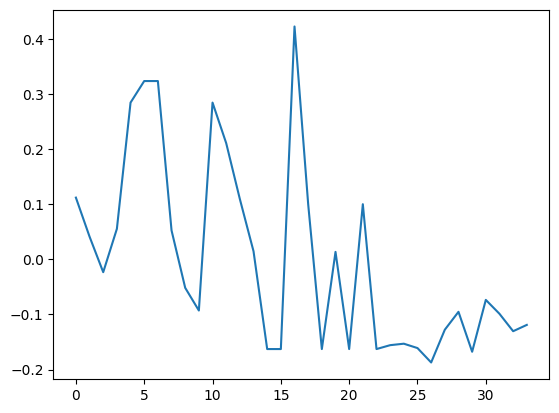

In [9]:
plt.plot(G.nodes(),v[:,1])
plt.show()

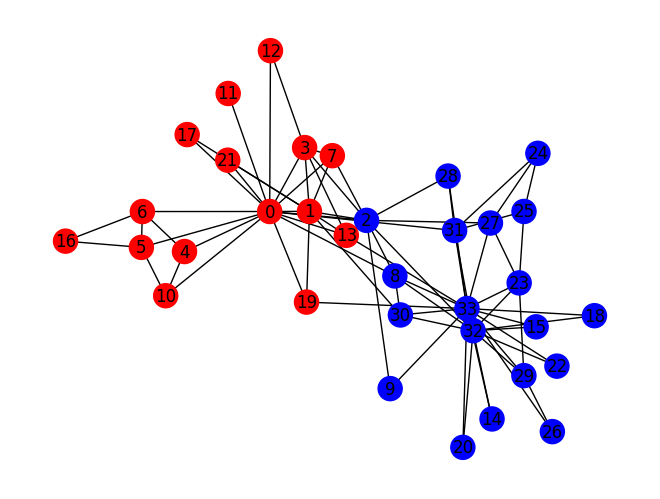

In [10]:
nx.draw(G, node_color=['r' if x == 1 else 'b' for x in f], with_labels=True)
plt.show()

<p class="task" id="2"></p>

2\. Повторите предыдущую задачу, используя нормализованную матрицу Лапласа $\mathbf{L}_{sym}=\mathbf{D^{-\frac{1}{2}}}\mathbf{L}\mathbf{D^{-\frac{1}{2}}}$. При расчете матрицы Лапласа явно укажите, что используется взвешенная матрица смежности $\mathbf{W}$.


- [X] Проверено на семинаре

In [11]:
L_sym = nx.normalized_laplacian_matrix(G, weight = 'weight').toarray()

In [12]:
u, v = np.linalg.eig(L_sym)
idx = np.argsort(u)
u = u[idx]
v = v[:, idx]
f = np.sign(v[:, 1])

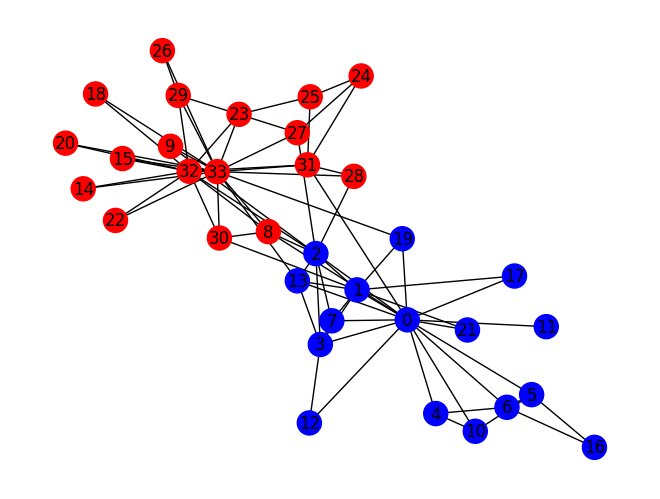

In [13]:
nx.draw(G, node_color=['r' if x == 1 else 'b' for x in f], with_labels=True)
plt.show()

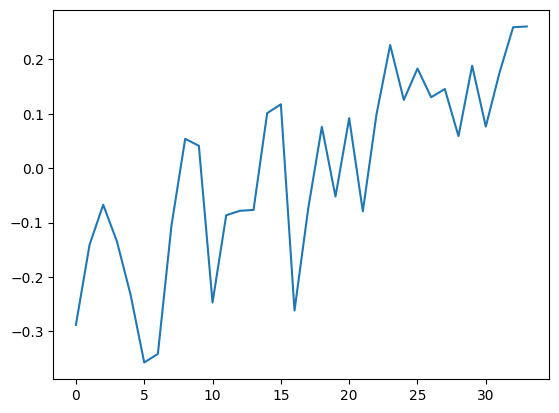

In [14]:
plt.plot(G.nodes(),v[:,1])
plt.show()

<p class="task" id="3"></p>

3\. Дан набор данных `(X, y`). Визуализируйте набор данных, отрисовав точки на плоскости и раскрасив в цвета, соответствующие меткам объектов `y`. Решите задачу кластеризации данных на 3 кластера при помощи алгоритма KMeans из `sklearn`. Визуализируйте полученный результат.

- [X] Проверено на семинаре

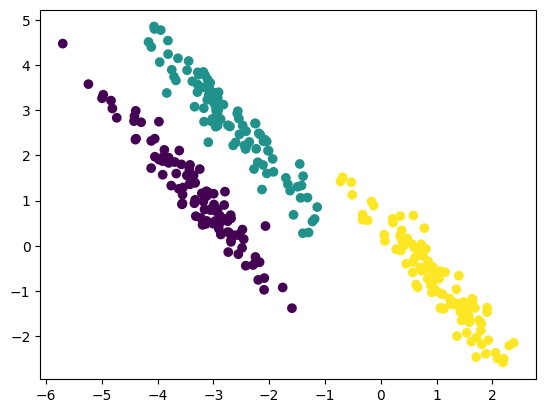

In [15]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, random_state=170)
X = np.dot(X, [[0.6, -0.6], [-0.4, 0.8]])

plt.scatter(X[:, 0], X[:, 1], c=y)

In [16]:
from sklearn.cluster import KMeans

In [17]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


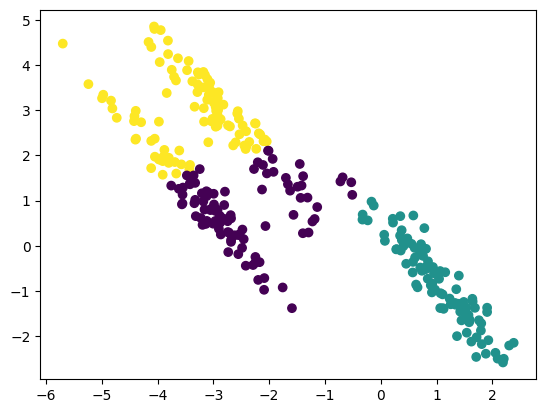

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.show()

<p class="task" id="4"></p>

4\. На основе датасета из предыдущего задания создайте граф при помощи функции `radius_neighbors_graph` из `sklearn` (укажите аргумент `radius=1`). Получите матрицу $U \in \mathbb{R}^{300\times3}$, состояющую из собственных векторов матрицы Лапласа, соответствующих трем наименьшим ненулевым собственным значениям. Решите задачу кластеризации при помощи алгоритма KMeans из `sklearn` на основе матрицы $U$. Визуализируйте полученный результат.

- [ ] Проверено на семинаре

In [34]:
from sklearn.neighbors import radius_neighbors_graph

In [48]:
A = radius_neighbors_graph(X, radius=1)

In [49]:
G = nx.Graph(A)
L = nx.laplacian_matrix(G).toarray()

In [57]:
u, v = np.linalg.eig(L)

In [58]:
np.sum(np.isclose(u, 0))

2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


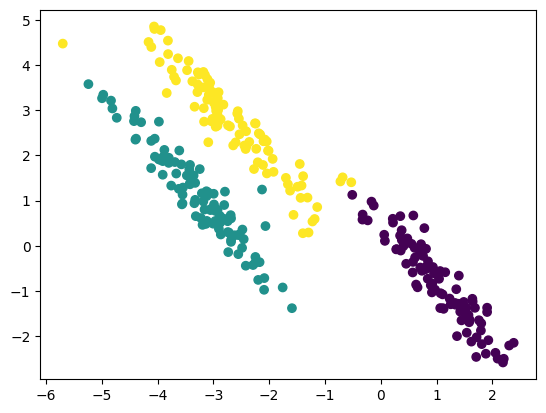

In [59]:
idx = np.argsort(u)
U = v[:, idx[2:5]]

kmeans = KMeans(n_clusters=3, random_state=0).fit(U)

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.show()


<p class="task" id="5"></p>

5\. Решите задачу кластеризации данных на 3 кластера при помощи алгоритма `SpectralClustering` из `sklearn`. Визуализируйте полученный результат. При создании модели кластеризации укажите значение аргумента `affinity='nearest_neighbors'`.

- [ ] Проверено на семинаре

In [38]:
from sklearn.cluster import SpectralClustering

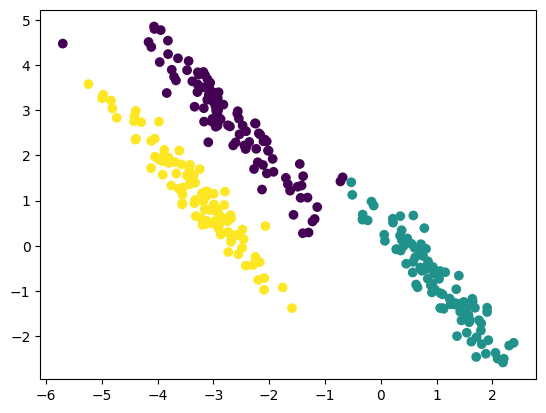

In [39]:
spectral_model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors')
clusters = spectral_model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.show()
